# Litecoin Growth Simulation

The **Litecoin Growth Simulation** notebook models the growth of users and daily transactions for Litewallet, a cryptocurrency wallet for Litecoin users, over a one-year period. This simulation uses simple growth parameters to project adoption and usage trends.

---

## **Key Components of the Simulation**

### **Parameters**
The simulation relies on the following initial parameters:
- **`initial_users`**: The starting number of Litewallet users. In this case, it is set to `1000`.
- **`adoption_rate`**: The daily growth rate of users (e.g., `0.05` represents 5% growth per day). This reflects new users joining Litewallet based on its current user base.
- **`usage_rate`**: The proportion of users actively using the wallet on a daily basis. Here, it is set to `0.8` (80%).
- **`time_steps`**: The simulation period in days, set to `365` for a year.

---

### **2. Simulation Logic**
The simulation calculates two main metrics for each day:

#### **Total Users (`users`)**
- Each day, the number of new users is computed as a percentage (`adoption_rate`) of the current user base.
- The total user count is updated by adding the new users to the existing base.

$$
\text{New Users} = \text{Users}_{t-1} \times \text{Adoption Rate}
$$

$$
\text{Users}_t = \text{Users}_{t-1} + \text{New Users}
$$



2. Daily Transactions (`daily_transactions`):

- The number of daily transactions is calculated as a proportion (`usage_rate`) of the total user base on each day.

$$ \text{Daily Transactions}_t​ = \text{Users}_t \times \text{Usage Rate} $$

### **3. Visualization**

The following cell generates a line plot to visualize:

- **Total Users**: How the user base grows over the simulation period.
- **Daily Transactions**: How the transaction count changes in response to user growth.

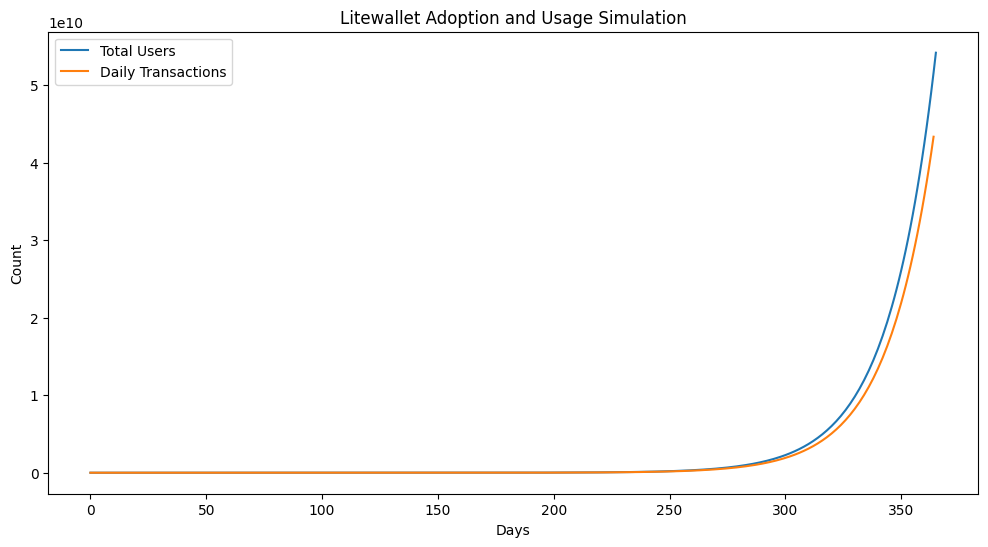

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_users = 1000
adoption_rate = 0.05  # 5% new users per time step
usage_rate = 0.8  # 80% of users use the wallet daily
time_steps = 365  # Simulate for one year

# Simulation
users = [initial_users]
daily_transactions = []

for t in range(time_steps):
    new_users = users[-1] * adoption_rate
    users.append(users[-1] + new_users)
    daily_transactions.append(users[-1] * usage_rate)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(users, label="Total Users")
plt.plot(daily_transactions, label="Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.title("Litewallet Adoption and Usage Simulation")
plt.show()

## **Simulation Parameters**

- **`initial_users`**: Starting user base, set to `1000`.
- **`carrying_capacity`**: Maximum potential user base, assumed to correlate with Litecoin's hashrate, set to `100,000`.
- **`growth_rate`**: User growth per time step, set to `10%` (`0.10`).
- **`time_steps`**: Simulation duration, set to `365` days (one year).

These parameters set the stage for simulating user growth dynamics within a defined ecosystem limit.


In [2]:
# Parameters
initial_users = 1000
carrying_capacity = (
    100000  # assumption: carrying capacity is highly correlated w/ hashrate
)
growth_rate = 0.10  # per time step
# adoption_rate = 0.05  # 5% new users per time step
# usage_rate = 0.8  # 80% of users use the wallet daily
time_steps = 365  # Simulate for one year

## Basic Logistic Growth

In [3]:
def logistic_growth(t, initial, carrying_capacity, rate):
    """
    Compute the logistic growth over time.

    Logistic growth models population growth that starts exponentially but slows
    as it approaches a maximum limit, called the carrying capacity.

    Parameters:
    -----------
    t : array-like
        Time steps for the simulation (e.g., days).
    initial : float
        Initial population or user base at the start of the simulation.
    carrying_capacity : float
        Maximum population or user base the system can sustain (limit).
    rate : float
        Growth rate per time step (e.g., daily growth rate).

    Returns:
    --------
    array-like
        Population or user base at each time step.

    Formula:
    --------
    P(t) = K / (1 + ((K - P0) / P0) * exp(-r * t))
    Where:
        - P(t): Population at time t
        - K: Carrying capacity
        - P0: Initial population
        - r: Growth rate
    """
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )

In the following example, we model a basic logistic growth simulation. as follows.

1. **User Growth Simulation**:
   - The `logistic_growth` function calculates the number of users for each day over 365 days.
   - Inputs:
     - `t=time`: An array representing each day in the simulation.
     - `initial=initial_users`: Starts with 1,000 users.
     - `carrying_capacity=carrying_capacity`: Limits the growth to a maximum of 100,000 users.
     - `rate=growth_rate`: Sets the daily growth rate at 10%.
   - The result, `users`, represents the total user count for each day.

2. **Daily Transactions**:
   - Assumes that 80% of users make transactions daily.
   - Computes:
    $ \text{daily\_transactions} = \text{users} \times 0.8$

3. **Visualization**:
   - Plots:
     - **`users`**: Total users over time (days).
     - **`daily_transactions`**: Daily transaction volume over time.
   - Sets up:
     - X-axis as **days** and Y-axis as **number of users or transactions**.
     - A legend to distinguish between "Total Users" and "Daily Transactions."
     - A grid for easier readability.

4. **Output**:
   - Displays a graph showing:
     - Logistic growth of total users.
     - Corresponding daily transactions over time.

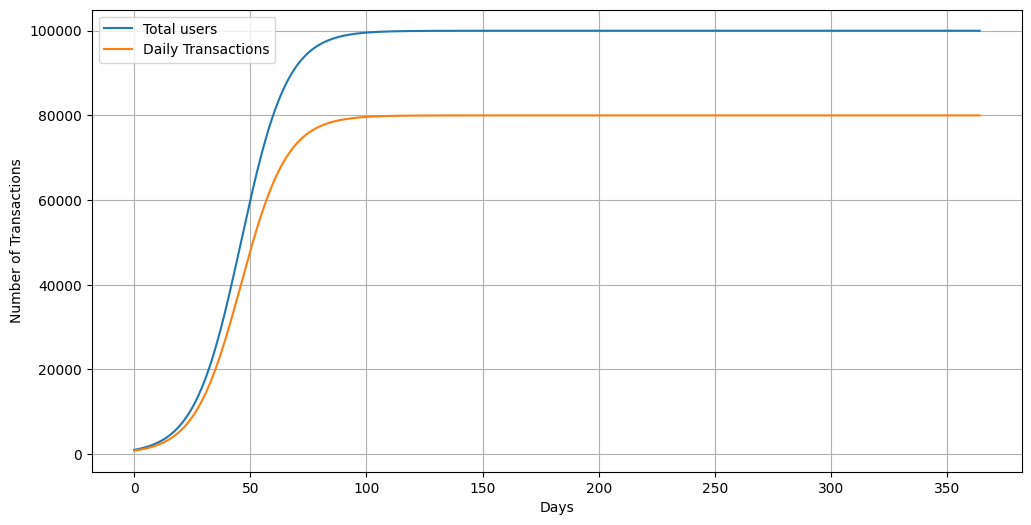

In [4]:
# Simulate this process
time = np.arange(time_steps)
users = logistic_growth(
    t=time,
    initial=initial_users,
    carrying_capacity=carrying_capacity,
    rate=growth_rate,
)
daily_transactions = users * 0.8  # if 80% of the users use the wallet daily

# plot these results
plt.figure(figsize=(12, 6))
plt.plot(time, users, label="Total users")
plt.plot(time, daily_transactions, label="Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.legend()
plt.grid(True)
plt.show()

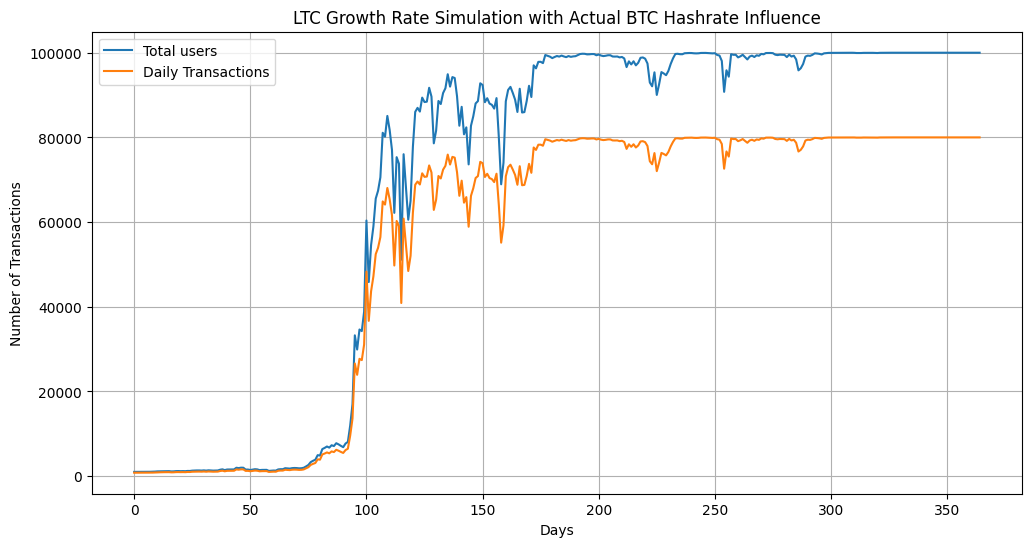

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt

# Fetch BTC hashrate data from CoinGecko API
response = requests.get(
    "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart",
    params={"vs_currency": "usd", "days": "365"},
)
data = response.json()

# Extract the hashrate values (here we use prices as an example; replace with
# hashrate if available)
prices = np.array([item[1] for item in data["prices"]])

# Normalize the hashrate data
btc_hashrate_normalized = (prices - np.min(prices)) / (np.max(prices) - np.min(prices))

# Use the length of the hashrate data as time_steps
time_steps = len(btc_hashrate_normalized)

# Parameters for the model
initial_users = 1000
carrying_capacity = (
    100000  # assumption: carrying capacity is highly correlated w/ hashrate
)
base_growth_rate = 0.10  # base growth rate per time step

# Adjust growth rate based on actual BTC hashrate
growth_rate = base_growth_rate * btc_hashrate_normalized


# Logistic growth function
def logistic_growth(t, initial, carrying_capacity, rate):
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )


# Simulate this process
time = np.arange(time_steps)
users = logistic_growth(
    t=time,
    initial=initial_users,
    carrying_capacity=carrying_capacity,
    rate=growth_rate,
)
daily_transactions = users * 0.8  # assuming that 80% of the users use the wallet daily

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, users, label="Total users")
plt.plot(time, daily_transactions, label="Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.title("LTC Growth Rate Simulation with Actual BTC Hashrate Influence")
plt.legend()
plt.grid(True)
plt.show()

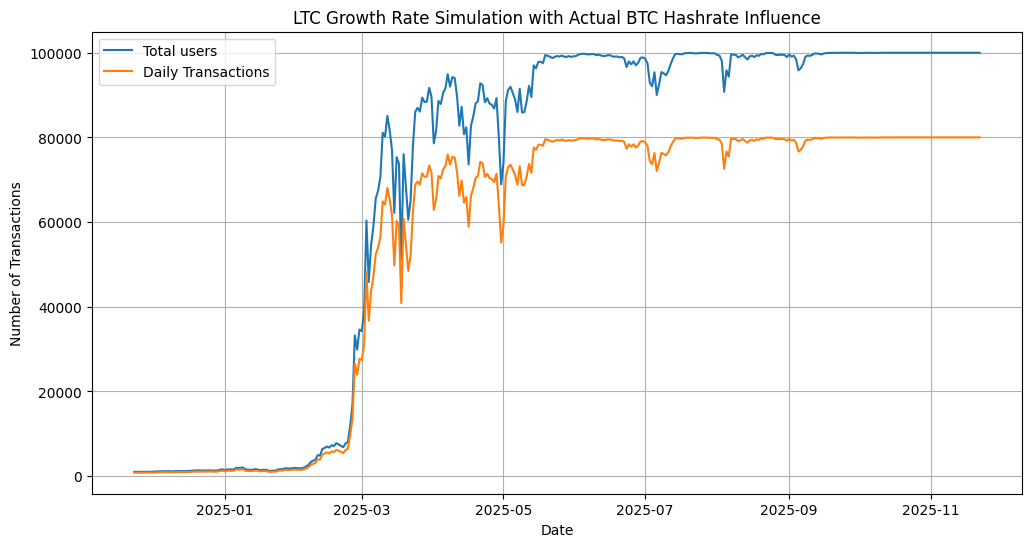

In [6]:
import datetime

# Define the start date (e.g., today)
start_date = datetime.date.today()

# Convert day numbers to actual dates
dates = [start_date + datetime.timedelta(days=int(day)) for day in time]

# Then you can use these dates for your x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(dates, users, label="Total users")
plt.plot(dates, daily_transactions, label="Daily Transactions")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("LTC Growth Rate Simulation with Actual BTC Hashrate Influence")
plt.legend()
plt.grid(True)
plt.show()

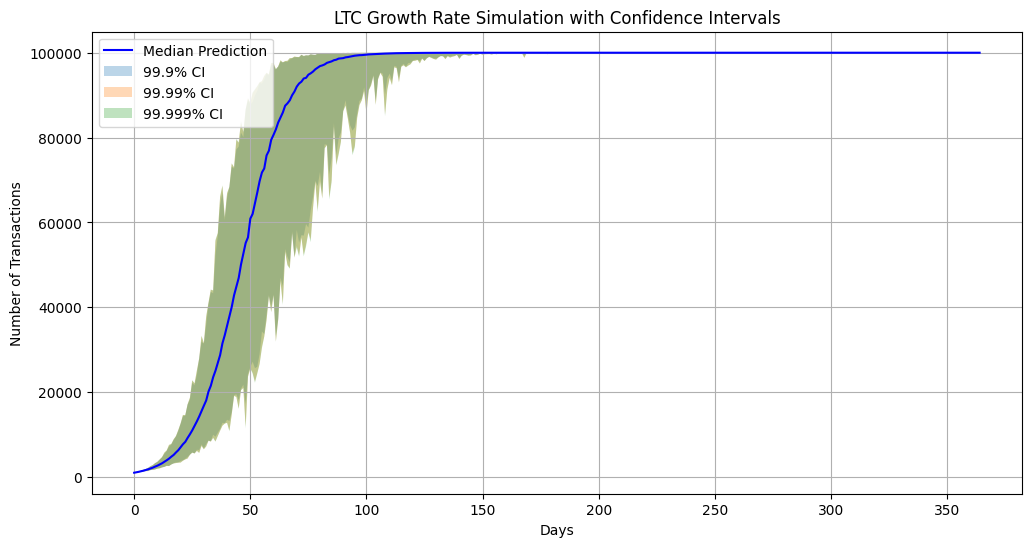

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
time_steps = 365  # Simulate for one year
num_simulations = 1000  # Number of Monte Carlo simulations


# Logistic growth function
def logistic_growth(t, initial, carrying_capacity, rate):
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )


# Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    # Add randomness to the growth rate, ensuring the shape matches `time`
    random_growth_rate = base_growth_rate + np.random.normal(
        0,
        0.01,
        size=time.shape,
    )

    # Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

# Calculate percentiles for confidence intervals
confidence_levels = [99.9, 99.99, 99.999]  # Confidence levels
confidence_intervals = {}

for confidence_level in confidence_levels:
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(all_users, lower_percentile, axis=0)
    upper_bound = np.percentile(all_users, upper_percentile, axis=0)
    confidence_intervals[confidence_level] = (lower_bound, upper_bound)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

# Plot confidence intervals
for confidence_level, (lower_bound, upper_bound) in confidence_intervals.items():
    plt.fill_between(
        time, lower_bound, upper_bound, alpha=0.3, label=f"{confidence_level}% CI"
    )

plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.title("LTC Growth Rate Simulation with Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()

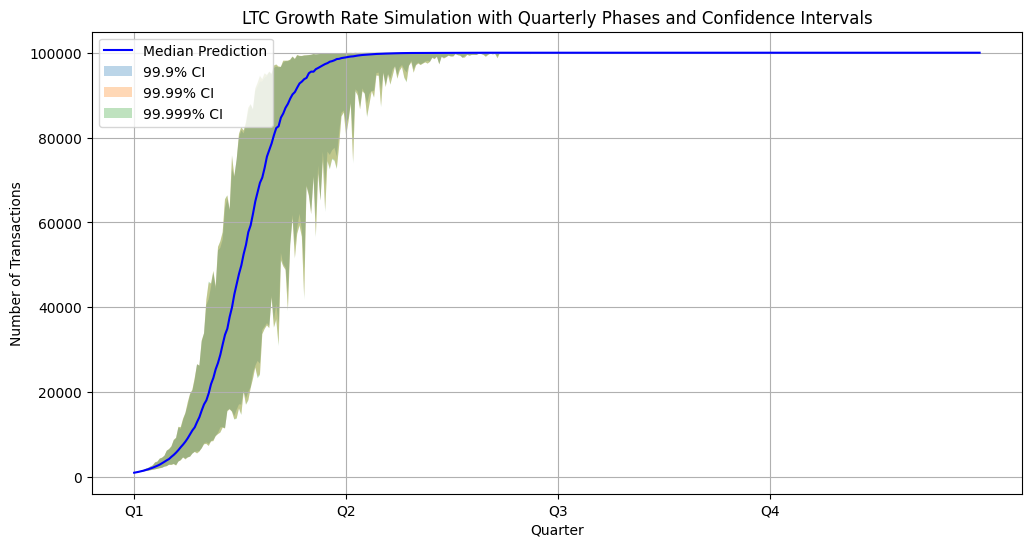

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
days_in_quarter = 91  # Approximate days per quarter
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations


# Logistic growth function
def logistic_growth(t, initial, carrying_capacity, rate):
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )


# Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    # Add randomness to the growth rate, ensuring the shape matches `time`
    random_growth_rate = base_growth_rate + np.random.normal(
        0,
        0.01,
        size=time.shape,
    )

    # Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

# Calculate percentiles for confidence intervals
confidence_levels = [99.9, 99.99, 99.999]  # Confidence levels
confidence_intervals = {}

for confidence_level in confidence_levels:
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(all_users, lower_percentile, axis=0)
    upper_bound = np.percentile(all_users, upper_percentile, axis=0)
    confidence_intervals[confidence_level] = (lower_bound, upper_bound)

# Define the quarters for plotting
quarters = ["Q1", "Q2", "Q3", "Q4"]
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

# Plot confidence intervals
for confidence_level, (lower_bound, upper_bound) in confidence_intervals.items():
    plt.fill_between(
        time, lower_bound, upper_bound, alpha=0.3, label=f"{confidence_level}% CI"
    )

# Customize the x-axis to reflect quarters
plt.xticks(quarter_ticks, quarters)

plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("LTC Growth Rate Simulation with Quarterly Phases and Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample BTC hashrate data (replace this with actual data fetching)
# Let's assume we have daily hashrate data for the last year
btc_hashrate_data = np.random.normal(
    150, 10, 365
)  # Replace with actual BTC hashrate data

# Normalize the hashrate data
btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
    np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
)

# Define the quarters
days_in_quarter = 91  # Approximate days per quarter
quarters = ["Q1", "Q2", "Q3", "Q4"]

# Divide the hashrate data into quarters
btc_hashrate_quarters = [
    btc_hashrate_normalized[:days_in_quarter],
    btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
    btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
    btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
]

# Combine quarters into a single array for simulation
btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)

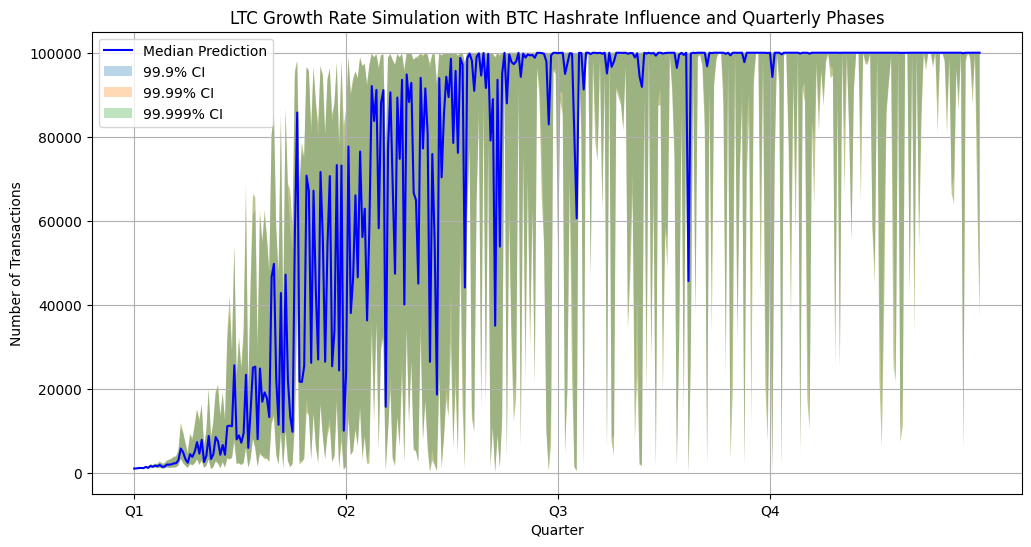

In [10]:
# Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations


# Logistic growth function
def logistic_growth(t, initial, carrying_capacity, rate):
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )


# Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    # Modify the growth rate based on actual hashrates per quarter
    random_growth_rate = (
        base_growth_rate * btc_hashrate_for_simulation
        + np.random.normal(0, 0.01, size=time.shape)
    )

    # Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

# Calculate percentiles for confidence intervals
confidence_levels = [99.9, 99.99, 99.999]  # Confidence levels
confidence_intervals = {}

for confidence_level in confidence_levels:
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(all_users, lower_percentile, axis=0)
    upper_bound = np.percentile(all_users, upper_percentile, axis=0)
    confidence_intervals[confidence_level] = (lower_bound, upper_bound)

# Define the quarters for plotting
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

# Plot confidence intervals
for confidence_level, (lower_bound, upper_bound) in confidence_intervals.items():
    plt.fill_between(
        time, lower_bound, upper_bound, alpha=0.3, label=f"{confidence_level}% CI"
    )

# Customize the x-axis to reflect quarters
plt.xticks(quarter_ticks, quarters)

plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("LTC Growth Rate Simulation with BTC Hashrate Influence and Quarterly Phases")
plt.legend()
plt.grid(True)
plt.show()

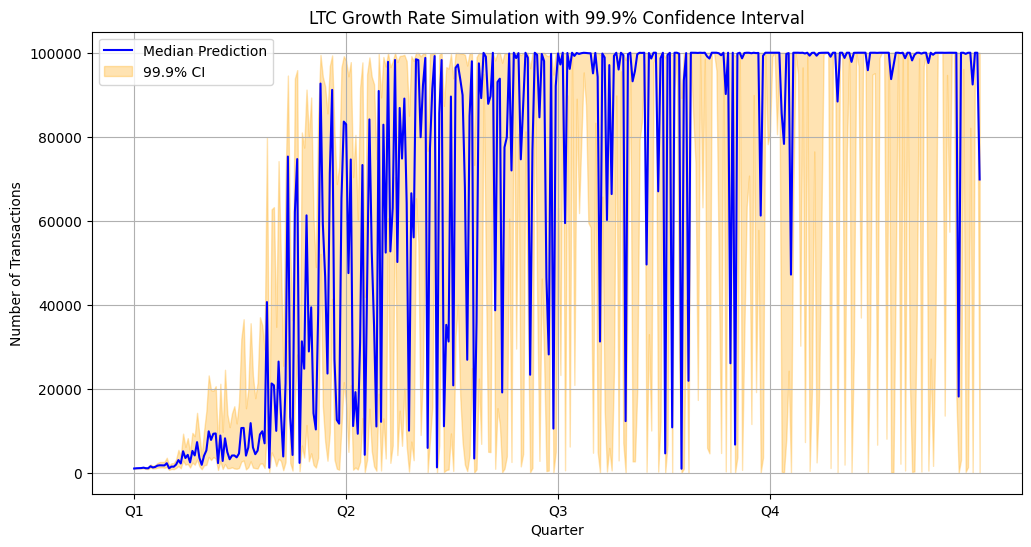

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
days_in_quarter = 91  # Approximate days per quarter
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations


# Logistic growth function
def logistic_growth(t, initial, carrying_capacity, rate):
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )


# Sample BTC hashrate data (replace this with actual data fetching)
btc_hashrate_data = np.random.normal(
    150, 10, 365
)  # Replace with actual BTC hashrate data

# Normalize the hashrate data
btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
    np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
)

# Divide the hashrate data into quarters
btc_hashrate_quarters = [
    btc_hashrate_normalized[:days_in_quarter],
    btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
    btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
    btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
]

# Combine quarters into a single array for simulation
btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)

# Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    # Modify the growth rate based on actual hashrates per quarter
    random_growth_rate = (
        base_growth_rate * btc_hashrate_for_simulation
        + np.random.normal(0, 0.01, size=time.shape)
    )

    # Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

# Calculate the 99.9% confidence interval
confidence_level = 99.9
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile

lower_bound = np.percentile(all_users, lower_percentile, axis=0)
upper_bound = np.percentile(all_users, upper_percentile, axis=0)

# Define the quarters for plotting
quarters = ["Q1", "Q2", "Q3", "Q4"]
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

# Plot the 99.9% confidence interval
plt.fill_between(
    time, lower_bound, upper_bound, alpha=0.3, label=f"99.9% CI", color="orange"
)

# Customize the x-axis to reflect quarters
plt.xticks(quarter_ticks, quarters)

plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("LTC Growth Rate Simulation with 99.9% Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()

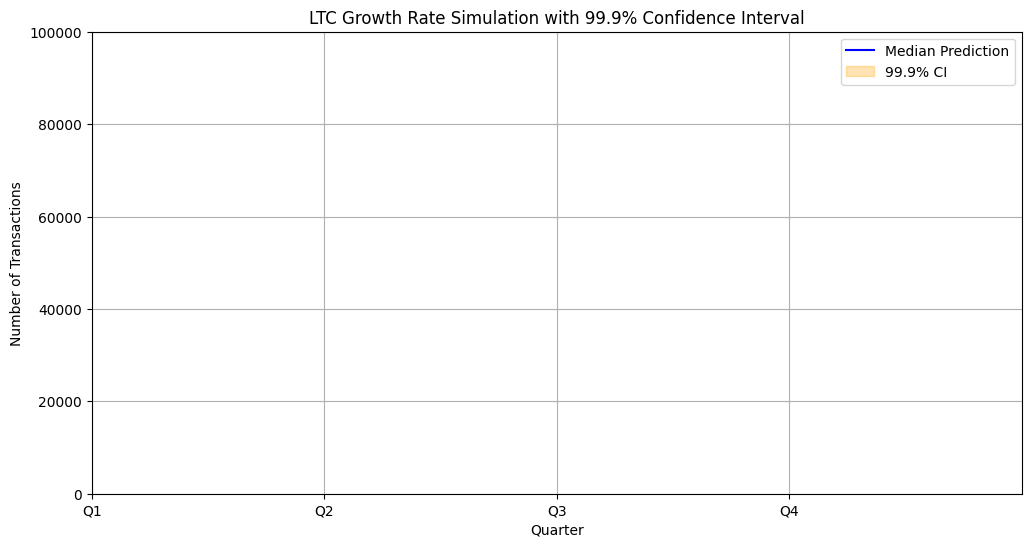

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
days_in_quarter = 91  # Approximate days per quarter
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations


# Logistic growth function
def logistic_growth(t, initial, carrying_capacity, rate):
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )


# Sample BTC hashrate data (replace this with actual data fetching)
btc_hashrate_data = np.random.normal(
    150, 10, 365
)  # Replace with actual BTC hashrate data

# Normalize the hashrate data
btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
    np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
)

# Divide the hashrate data into quarters
btc_hashrate_quarters = [
    btc_hashrate_normalized[:days_in_quarter],
    btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
    btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
    btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
]

# Combine quarters into a single array for simulation
btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)

# Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    # Modify the growth rate based on actual hashrates per quarter
    random_growth_rate = (
        base_growth_rate * btc_hashrate_for_simulation
        + np.random.normal(0, 0.01, size=time.shape)
    )

    # Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

# Calculate the 99.9% confidence interval
confidence_level = 99.9
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile

lower_bound = np.percentile(all_users, lower_percentile, axis=0)
upper_bound = np.percentile(all_users, upper_percentile, axis=0)

# Define the quarters for plotting
quarters = ["Q1", "Q2", "Q3", "Q4"]
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, time_steps)
ax.set_ylim(0, carrying_capacity)
ax.set_xticks(quarter_ticks)
ax.set_xticklabels(quarters)
ax.set_xlabel("Quarter")
ax.set_ylabel("Number of Transactions")
ax.set_title("LTC Growth Rate Simulation with 99.9% Confidence Interval")

(median_line,) = ax.plot([], [], label="Median Prediction", color="blue")
ci_fill = ax.fill_between([], [], [], alpha=0.3, color="orange", label=f"99.9% CI")
ax.legend()
ax.grid(True)


# Initialization function
def init():
    median_line.set_data([], [])
    return median_line, ci_fill


# Animation function
def animate(i):
    median_line.set_data(time[:i], np.median(all_users, axis=0)[:i])
    ci_fill = ax.fill_between(
        time[:i], lower_bound[:i], upper_bound[:i], alpha=0.3, color="orange"
    )
    return median_line, ci_fill


# Create the animation
anim = FuncAnimation(
    fig, animate, init_func=init, frames=len(time), interval=100, blit=True
)

plt.show()